In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [7]:
# create dataframe
travel_insurance_df = pd.read_csv("travel insurance.csv")
travel_insurance_df_original = travel_insurance_df.copy()

In [8]:
travel_insurance_df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


<p><b>Note</b>: Missing data can be seen in Gender column from initial view. </p>
<p>Next step: Examine columns further to reveal the amount of data missing (Null/NaN)</p>

In [9]:
travel_insurance_df.shape

(63326, 11)

In [10]:
travel_insurance_df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [11]:
travel_insurance_df.head().isnull()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [12]:
travel_insurance_df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [13]:
63326-45107

18219

In [14]:
travel_insurance_df["Gender"].value_counts()

M    9347
F    8872
Name: Gender, dtype: int64

In [15]:
travel_insurance_missing_df = travel_insurance_df.copy()

In [16]:
missing_rows = travel_insurance_df[travel_insurance_df["Gender"].isnull()]
missing_rows

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.50,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.60,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.80,11.88,NaN,41
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.60,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.90,65.34,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...
63309,SSI,Airlines,Online,Ticket Protector,No,41,SINGAPORE,11.58,3.25,NaN,48
63310,SSI,Airlines,Online,Ticket Protector,No,69,SINGAPORE,12.87,3.61,NaN,48
63311,SSI,Airlines,Online,Ticket Protector,No,96,SINGAPORE,5.92,1.66,NaN,48
63312,SSI,Airlines,Online,Ticket Protector,No,61,SINGAPORE,6.56,1.84,NaN,48


In [17]:
# removing rows with missing values 

travel_insurance_missing_df.drop(index=missing_rows.index, axis=0, inplace=True)

In [18]:
travel_insurance_missing_df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

In [19]:
travel_insurance_missing_df.shape

(18219, 11)

In [20]:
travel_insurance_missing_df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
11,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.0,6.30,M,47
12,KML,Travel Agency,Online,Premier Plan,No,53,NORWAY,-130.0,49.40,F,48


In [21]:
travel_insurance_missing_df.head(20)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.00,9.57,F,71
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.00,42.35,F,44
11,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.00,6.30,M,47
12,KML,Travel Agency,Online,Premier Plan,No,53,NORWAY,-130.00,49.40,F,48
18,JZI,Airlines,Online,Basic Plan,No,3,MALAYSIA,-18.00,6.30,M,47
21,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
22,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
23,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
24,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,M,26


In [22]:
travel_insurance_missing_df["Distribution Channel"].value_counts()

Online     17206
Offline     1013
Name: Distribution Channel, dtype: int64

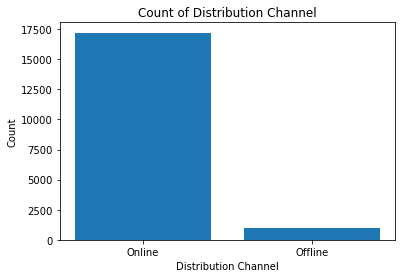

In [23]:
x = travel_insurance_missing_df["Distribution Channel"].value_counts().index
y = travel_insurance_missing_df["Distribution Channel"].value_counts().values

plt.bar(x=x,height=y)
plt.title("Count of Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Count")
plt.show()

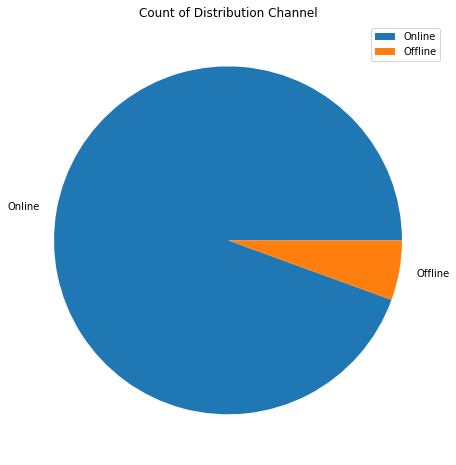

In [24]:
plt.figure(figsize=(10,8))
plt.pie(x=y,labels=x)
plt.legend()
plt.title("Count of Distribution Channel")
plt.show()

In [25]:
travel_insurance_missing_df.groupby("Distribution Channel")

In [26]:
travel_insurance_missing_df.groupby("Distribution Channel")["Net Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Distribution Channel,,,,,,,,
Offline,1013.0,36.141658,21.313027,-30.0,29.0,30.0,30.0,153.0
Online,17206.0,58.745704,75.665473,-389.0,22.0,30.0,56.5,810.0


In [27]:
travel_insurance_missing_df.groupby("Distribution Channel")["Net Sales"].sum()

Distribution Channel
Offline      36611.50
Online     1010778.59
Name: Net Sales, dtype: float64

In [28]:
def plot_chart(charttype, data):

    if charttype == "bar":
        x = data.index
        y = data.values
        plt.bar(x=x,height=y)

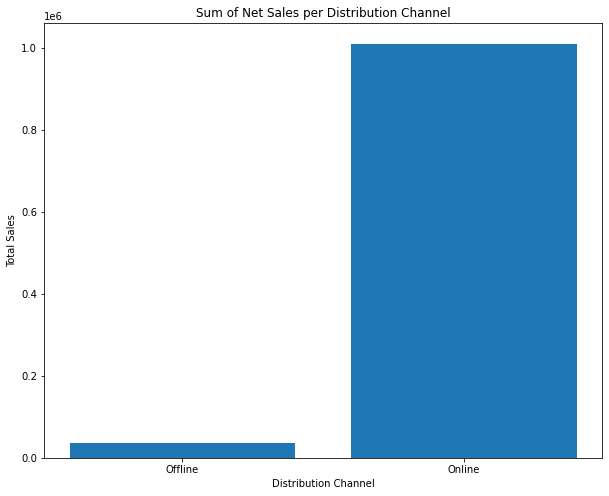

In [29]:
plt.figure(figsize=(10,8))
plot_chart("bar",travel_insurance_missing_df.groupby("Distribution Channel")["Net Sales"].sum())
plt.title("Sum of Net Sales per Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Total Sales")
plt.show()

Plotting a histogram

In [30]:
offline = travel_insurance_missing_df[travel_insurance_missing_df["Distribution Channel"] == "Offline"]
online = travel_insurance_missing_df[travel_insurance_missing_df["Distribution Channel"] == "Online"]

In [32]:
offline["Age"].describe()

count    1013.000000
mean       53.883514
std        23.564399
min         0.000000
25%        34.000000
50%        56.000000
75%        68.000000
max       118.000000
Name: Age, dtype: float64

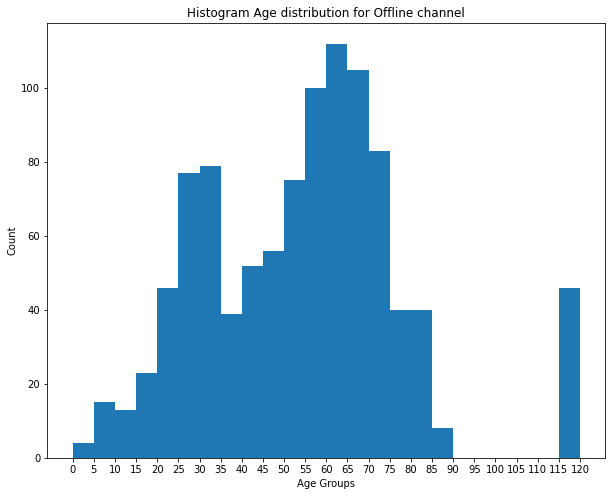

In [42]:
# Create bins with step-size 10
plt.figure(figsize=(10,8))
bins = np.arange(0, offline['Age'].max()+5, 5)
plt.hist(data = offline, x = 'Age', bins = bins)
plt.xticks(bins)
plt.title("Histogram Age distribution for Offline channel")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.show()

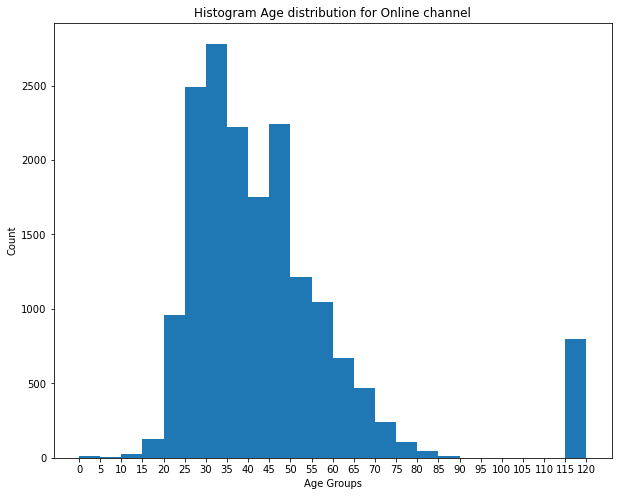

In [43]:
plt.figure(figsize=(10,8))
bins = np.arange(0, online['Age'].max()+5, 5)
plt.hist(data = online, x = 'Age', bins = bins)
plt.xticks(bins)
plt.title("Histogram Age distribution for Online channel")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.show()

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

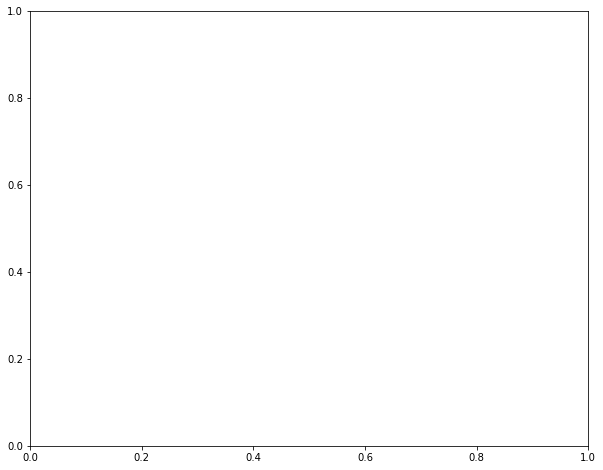

In [44]:
plt.figure(figsize=(10,8))
bins = np.arange(0, travel_insurance_missing_df['Age'].max()+10, 10)
plt.hist(data = offline, x = 'Age', bins = bins, color="Distribution Channel")
plt.xticks(bins)
plt.title("Histogram Age distribution for Offline channel")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.show()